<a href="https://colab.research.google.com/github/AMIT110409/PCA-extern-/blob/main/PCA_extern.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
## how  many  number of principal component needed

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline   ## This is useful for debugging and inspecting plots

In [2]:
## we are using the free glass dataset.

# The objective is to tell the type of glass based on amount of other elements

data = pd.read_csv('glass.csv')

In [3]:
data.head()

,index,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Class
0,1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [4]:
data.Class.unique()   ## class classification means how many class are there

array([1, 2, 3, 5, 6, 7])

In [5]:
## basic checks .

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   index   214 non-null    int64  
 1   RI      214 non-null    float64
 2   Na      214 non-null    float64
 3   Mg      214 non-null    float64
 4   Al      214 non-null    float64
 5   Si      214 non-null    float64
 6   K       214 non-null    float64
 7   Ca      214 non-null    float64
 8   Ba      214 non-null    float64
 9   Fe      214 non-null    float64
 10  Class   214 non-null    int64  
dtypes: float64(9), int64(2)
memory usage: 18.5 KB


In [6]:
data.describe()

,index,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Class
count,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
mean,107.500000,1.518365,13.407850,2.684533,1.444907,72.650935,0.497056,8.956963,0.175047,0.057009,2.780374
std,61.920648,0.003037,0.816604,1.442408,0.499270,0.774546,0.652192,1.423153,0.497219,0.097439,2.103739
min,1.000000,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000,1.000000
25%,54.250000,1.516522,12.907500,2.115000,1.190000,72.280000,0.122500,8.240000,0.000000,0.000000,1.000000
50%,107.500000,1.517680,13.300000,3.480000,1.360000,72.790000,0.555000,8.600000,0.000000,0.000000,2.000000
75%,160.750000,1.519157,13.825000,3.600000,1.630000,73.087500,0.610000,9.172500,0.000000,0.100000,3.000000
max,214.000000,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000,7.000000


In [7]:
## exploratory data analysis

## Data preprocessing

## checking missing value

data.isnull().sum()



index    0
RI       0
Na       0
Mg       0
Al       0
Si       0
K        0
Ca       0
Ba       0
Fe       0
Class    0
dtype: int64

In [8]:
## creating X and y

X = data.drop(labels=['index','Class'], axis=1)

In [9]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_data=scaler.fit_transform(X)


In [10]:
## creating new dataframe
df = pd.DataFrame(data=scaled_data,columns=X.columns)



In [11]:
df.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe
0,0.872868,0.284953,1.254639,-0.692442,-1.127082,-0.671705,-0.145766,-0.352877,-0.586451
1,-0.249333,0.591817,0.636168,-0.170460,0.102319,-0.026213,-0.793734,-0.352877,-0.586451
2,-0.721318,0.149933,0.601422,0.190912,0.438787,-0.164533,-0.828949,-0.352877,-0.586451
3,-0.232831,-0.242853,0.698710,-0.310994,-0.052974,0.112107,-0.519052,-0.352877,-0.586451
4,-0.312045,-0.169205,0.650066,-0.411375,0.555256,0.081369,-0.624699,-0.352877,-0.586451


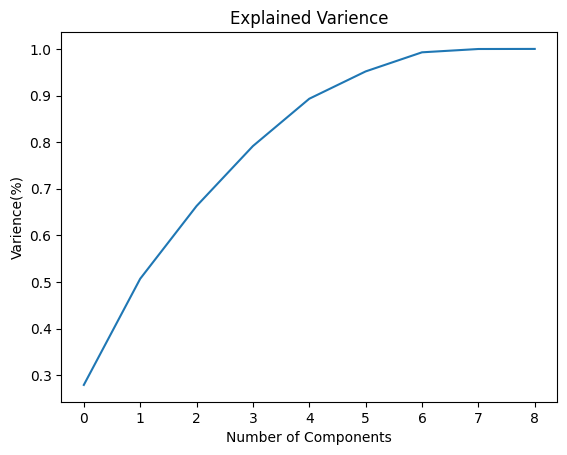

In [13]:
## getting hte no of optimal number of pca

from sklearn.decomposition import PCA
pca = PCA()
principalComponents = pca.fit_transform(df)
plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Varience(%)') # for each component
plt.title('Explained Varience')
plt.show()

From the diagram above, it can be seen that 4 principal components explain almost 90% of the variance in data and 5 principal components explain around 95% of the variance in data.

So, instead of giving all the columns as input, we’d only feed these 4 principal components of the data to the machine learning algorithm and we’d obtain a similar result.

In [14]:
pca = PCA(n_components=4)
new_data = pca.fit_transform(df)

## this willbe the new data fed to the algorithm.

principal_Df = pd.DataFrame(data = new_data,columns=['principal component 1','principal component 2','principal component 3','principal component 4'])

In [15]:
## new pca Dataframe
principal_Df.head()

,principal component 1,principal component 2,principal component 3,principal component 4
0,1.151140,-0.529488,-0.372096,1.728901
1,-0.574137,-0.759788,-0.556708,0.760232
2,-0.940160,-0.929836,-0.554907,0.206254
3,-0.142083,-0.961677,-0.117125,0.415724
4,-0.351092,-1.091249,-0.485079,0.069102


Here, we see that earlier we had 9 columns in the data earlier. Now with the help of plot and PCA, we have reduced the number of features to be used for model building to 4. This is the advantage of PCA. It drastically reduces the number of features, thereby considerably reducing the training time for the model.**bold text**

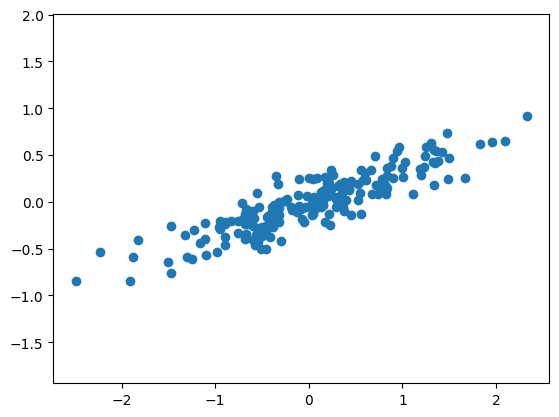

In [17]:
#Visualizing the principal components

## As humans can only perceive 3 dimension ,we'll take a dataset with less than 4 dimension .

np.random.seed(1)
X = np.dot(np.random.random(size=(2,2)),np.random.normal(size=(2,200))).T
plt.plot(X[:,0],X[:,1],'o')
plt.axis('equal');



Pros of PCA:

Correlated features are removed.

Model training time is reduced.

Overfitting is reduced.

Helps in better visualizations

Ability to handle noise

Cons of PCA

The resultant principal components are less interpretable than the original data
Can lead to information loss if the explained variance threshold is not considered appropriately.

Conclusion

From all the explanations above, we can conclude that PCA is a very powerful technique for reducing the dimensions of the data, projecting the data from a higher dimension to a lower dimension, helps in data visualization, helps in data compression and most of all increases the model training speed drastically by decreasing the number of variables involved in computation.